In [2]:
import numpy as np
import pandas as pd

# Multi-index series

### Can we have multiple index in serise? Let's try

In [3]:
index_val = [('cse',2019),('cse',2020),('cse',2021),('cse',2022),('eee',2019),('eee',2020),('eee',2021),('eee',2022)] # wrong way to create multiindex
sseries = pd.Series([120,323,233,423,134,223,145,345],index=index_val)
sseries

sseries[('eee',2021)] # fetch value using index

### but there are a problem, we can fetch the values based only any particular department

np.int64(145)

### The solution-> multi-index series/object (also known as Hierarchical indexing)

### How to create Multi-index object?

In [4]:
### The solution-> multi-index series (also known as Hierarchical indexing)
## 1. pd.MultiIndex.from_tuples()  #the right way
index_val = [('cse',2019),('cse',2020),('cse',2021),('cse',2022),('eee',2019),('eee',2020),('eee',2021),('eee',2022)]
mul_in = pd.MultiIndex.from_tuples(index_val)
mul_in
# mul_in.levels[0]
# mul_in.levels[1]


## 2. pd.MultiIndex.from_produc() # another right way & this is more useful
m_i = pd.MultiIndex.from_product([['cse','eee'],[2019,2020,2021,2022]])
m_i

MultiIndex([('cse', 2019),
            ('cse', 2020),
            ('cse', 2021),
            ('cse', 2022),
            ('eee', 2019),
            ('eee', 2020),
            ('eee', 2021),
            ('eee', 2022)],
           )

### Create a series with multi-index object

In [5]:
pd.Series([1,2,3,4,5,6,7,8],index=mul_in) # using the tuple's one
s = pd.Series([1,2,3,4,5,6,7,8],index=m_i) # using the product's one
s

cse  2019    1
     2020    2
     2021    3
     2022    4
eee  2019    5
     2020    6
     2021    7
     2022    8
dtype: int64

### How to fetch items from a series

In [6]:
s # this is a 2D series
## I want to fetch '4'
s[('cse',2022)]

## I want everything of cse
s['cse']

2019    1
2020    2
2021    3
2022    4
dtype: int64

### Convert 2D series(multi-index series) into dataframe using - unstack()


In [7]:
d = s.unstack()
d

,2019,2020,2021,2022
cse,1,2,3,4
eee,5,6,7,8


### Convert a dataframe into multi-index series using - stack()

In [8]:
d.stack()

cse  2019    1
     2020    2
     2021    3
     2022    4
eee  2019    5
     2020    6
     2021    7
     2022    8
dtype: int64

# Multi-index dataframe

In [9]:
### when a dataframe has 2-indexes, it means it is a 3D dataframe

mi_df = pd.DataFrame(
    [
        [1,2],
        [3,4],
        [5,6],
        [7,8],
        [9,10],
        [11,12],
        [13,14],
        [15,16],
    ],
    index = m_i,
    columns = ['avg_package','students']
)

mi_df

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
eee 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

### How to fetch items from a dataframe

In [10]:
## fetch everything of 'cse'
mi_df.loc['cse']

## fetch everything of 'avg_package'
mi_df['avg_package']

cse  2019     1
     2020     3
     2021     5
     2022     7
eee  2019     9
     2020    11
     2021    13
     2022    15
Name: avg_package, dtype: int64

### Multi-index df from 'columns' perspective/ hierarchical column/ multi-column

In [11]:
mc_df = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
    ],
    index = [2019,2020,2021,2022],
    columns = pd.MultiIndex.from_product([['dhaka','chittagong'],['avg_package','students']])
)

mc_df

dhaka           chittagong         
     avg_package students avg_package students
2019           1        2           0        0
2020           3        4           0        0
2021           5        6           0        0
2022           7        8           0        0

In [12]:
### fetch items from a dataframe

## get all about 'dhaka'
# mc_df['dhaka']

## get 'avg_package' of dhaka
# mc_df['dhaka']['avg_package']

## fetch all data of 2020
mc_df.loc[2020]

dhaka       avg_package    3
            students       4
chittagong  avg_package    0
            students       0
Name: 2020, dtype: int64

### Multi-index df in terms of both column and index

In [13]:
m_ic_df = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
        [9,10,0,0],
        [11,12,0,0],
        [13,14,0,0],
        [15,16,0,0],
    ],
    index = m_i,
    columns = pd.MultiIndex.from_product([['delhi','mumbai'],['avg_package','students']])
)

m_ic_df

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
eee 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

### Stacking and Unstacking

### unstack() - convert 'inward-index/index' into 'inward-column/column'
### stack(future_stack=True) - opposite of unstack- it convert 'inward-column/column' into 'inward-index/index'

In [76]:
### unstack
mi_df
# mi_df.unstack()
mi_df.unstack().unstack()

avg_package  2019  cse     1
                   eee     9
             2020  cse     3
                   eee    11
             2021  cse     5
                   eee    13
             2022  cse     7
                   eee    15
students     2019  cse     2
                   eee    10
             2020  cse     4
                   eee    12
             2021  cse     6
                   eee    14
             2022  cse     8
                   eee    16
dtype: int64

In [83]:
### stack
mi_df
mi_df.stack()
# mi_df.unstack()
# mi_df.unstack().stack(future_stack=True)
# mi_df.stack(future_stack=True)

cse  2019  avg_package     1
           students        2
     2020  avg_package     3
           students        4
     2021  avg_package     5
           students        6
     2022  avg_package     7
           students        8
eee  2019  avg_package     9
           students       10
     2020  avg_package    11
           students       12
     2021  avg_package    13
           students       14
     2022  avg_package    15
           students       16
dtype: int64

### Working with multi-indexed dataframe

In [16]:
m_ic_df

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
eee 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [89]:
### head and tail
# m_ic_df.head(3)

### shape
# m_ic_df.shape
# m_ic_df.shape[0]

### info - gives the columns information
# m_ic_df.info()

### duplicated - to check any 'row' duplicated or not
# m_ic_df.duplicated()

### isnull
# m_ic_df.isnull()

m_ic_df

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
eee 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

### Extracting 'row' (single)

In [90]:
m_ic_df.loc[('cse',2020)]

delhi   avg_package    3
        students       4
mumbai  avg_package    0
        students       0
Name: (cse, 2020), dtype: int64

### Extracting 'row' (multiple)

In [91]:
m_ic_df.loc[[('cse',2020),('eee',2020)]] # for selected rows

delhi               mumbai         
         avg_package students avg_package students
cse 2020           3        4           0        0
eee 2020          11       12           0        0

In [20]:
m_ic_df.loc[('cse',2021):('eee',2021)] # for certain part

delhi               mumbai         
         avg_package students avg_package students
cse 2021           5        6           0        0
    2022           7        8           0        0
eee 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0

In [21]:
m_ic_df.loc[('cse',2021):('eee',2021):2] # for alternate rows (step)

delhi               mumbai         
         avg_package students avg_package students
cse 2021           5        6           0        0
eee 2019           9       10           0        0
    2021          13       14           0        0

In [22]:
### using iloc[]
m_ic_df.iloc[1] # this index number don't visible but consider in background in pandas

delhi   avg_package    3
        students       4
mumbai  avg_package    0
        students       0
Name: (cse, 2020), dtype: int64

In [23]:
m_ic_df.iloc[2:7] # for certain part

delhi               mumbai         
         avg_package students avg_package students
cse 2021           5        6           0        0
    2022           7        8           0        0
eee 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0

In [24]:
m_ic_df

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
eee 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

### Extracting 'column' (single)

In [25]:
m_ic_df[('delhi','students')]   # for (delhi,students)

cse  2019     2
     2020     4
     2021     6
     2022     8
eee  2019    10
     2020    12
     2021    14
     2022    16
Name: (delhi, students), dtype: int64

In [26]:
m_ic_df['delhi']['students'] # alternative

cse  2019     2
     2020     4
     2021     6
     2022     8
eee  2019    10
     2020    12
     2021    14
     2022    16
Name: students, dtype: int64

### Extracting 'column' (multiple)

In [27]:
m_ic_df[[('delhi','avg_package'),('mumbai','students')]]   # for (delhi,avg_package) and (mumbai,students)


delhi   mumbai
         avg_package students
cse 2019           1        0
    2020           3        0
    2021           5        0
    2022           7        0
eee 2019           9        0
    2020          11        0
    2021          13        0
    2022          15        0

In [28]:
m_ic_df.iloc[:,0:3]  # alternative , here - [row,column] - we can also say- it fetch both row and column


delhi               mumbai
         avg_package students avg_package
cse 2019           1        2           0
    2020           3        4           0
    2021           5        6           0
    2022           7        8           0
eee 2019           9       10           0
    2020          11       12           0
    2021          13       14           0
    2022          15       16           0

### Extracting both 'row & column'

In [29]:
m_ic_df.iloc[[1,2,5],[0,2,3]]  # use fancy indexing

delhi      mumbai         
         avg_package avg_package students
cse 2020           3           0        0
    2021           5           0        0
eee 2020          11           0        0

### Sorting the index of multi-index dataframe -  will perform sort on both level 0  and level 1

In [92]:
m_ic_df

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
eee 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [30]:
m_ic_df.sort_index(ascending=False) # both index sorted ascending order

delhi               mumbai         
         avg_package students avg_package students
eee 2022          15       16           0        0
    2021          13       14           0        0
    2020          11       12           0        0
    2019           9       10           0        0
cse 2022           7        8           0        0
    2021           5        6           0        0
    2020           3        4           0        0
    2019           1        2           0        0

In [31]:
m_ic_df.sort_index(ascending=[True,False])  # for dept.-> ascending & year -> descending

delhi               mumbai         
         avg_package students avg_package students
cse 2022           7        8           0        0
    2021           5        6           0        0
    2020           3        4           0        0
    2019           1        2           0        0
eee 2022          15       16           0        0
    2021          13       14           0        0
    2020          11       12           0        0
    2019           9       10           0        0

In [32]:
### sorting on the basis of one level
m_ic_df.sort_index(level=1,ascending=[False]) # [False]- the bracket is mandatory here for sort only one level

delhi               mumbai         
         avg_package students avg_package students
cse 2022           7        8           0        0
eee 2022          15       16           0        0
cse 2021           5        6           0        0
eee 2021          13       14           0        0
cse 2020           3        4           0        0
eee 2020          11       12           0        0
cse 2019           1        2           0        0
eee 2019           9       10           0        0

### transpose()- row to column and column to row

In [33]:
m_ic_df.transpose()

cse                 eee               
                   2019 2020 2021 2022 2019 2020 2021 2022
delhi  avg_package    1    3    5    7    9   11   13   15
       students       2    4    6    8   10   12   14   16
mumbai avg_package    0    0    0    0    0    0    0    0
       students       0    0    0    0    0    0    0    0

### swaplevel()  - to swap the index or column levels 

In [34]:
m_ic_df.swaplevel() # index level swap

delhi               mumbai         
         avg_package students avg_package students
2019 cse           1        2           0        0
2020 cse           3        4           0        0
2021 cse           5        6           0        0
2022 cse           7        8           0        0
2019 eee           9       10           0        0
2020 eee          11       12           0        0
2021 eee          13       14           0        0
2022 eee          15       16           0        0

In [35]:
m_ic_df.swaplevel(axis=1) # column level swap

avg_package students avg_package students
               delhi    delhi      mumbai   mumbai
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
eee 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

# Wide vs Long Data

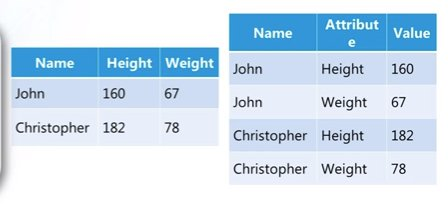

Wide format is where we have a 'single row' for every "data point" with 'multiple columns' to hold the values of various attributes.

Long format is where, for each data point we have 'as many rows as' the number of "attributes" and each row contains the value of a particular attribute for a given data point.

### Melt- convert Wide to Long Data

In [36]:
pd.DataFrame({   # normal df
    'cse':[120],
    'eee':[100],
    'phar':[50]
    })

,cse,eee,phar
0,120,100,50


In [37]:
pd.DataFrame({     # after using melt()
    'cse':[120],
    'eee':[100],
    'phar':[50]
    }).melt()

,variable,value
0,cse,120
1,eee,100
2,phar,50


In [38]:
pd.DataFrame({
    'cse':[120],
    'eee':[100],
    'phar':[50]
    }).melt(var_name='dept',value_name='num_students') # rename the column name/x_name

,dept,num_students
0,cse,120
1,eee,100
2,phar,50


In [39]:
### using another data frame with dept and year
pd.DataFrame(
    {
        'dept':['cse','eee','civl'],
        '2020':[100,150,60],
        '2021':[120,130,80],
        '2022':[150,140,70]
    }
)

,dept,2020,2021,2022
0,cse,100,120,150
1,eee,150,130,140
2,civl,60,80,70


In [40]:
## using melt
pd.DataFrame(
    {
        'dept':['cse','eee','civl'],
        '2020':[100,150,60],
        '2021':[120,130,80],
        '2022':[150,140,70]
    }
).melt()  # but this is not desirable

,variable,value
0,dept,cse
1,dept,eee
2,dept,civl
3,2020,100
4,2020,150
5,2020,60
6,2021,120
7,2021,130
8,2021,80
9,2022,150


In [41]:
pd.DataFrame(
    {
        'dept':['cse','eee','civl'],
        '2020':[100,150,60],
        '2021':[120,130,80],
        '2022':[150,140,70]
    }                                # This is the right way to represent data in Long format
).melt(id_vars=['dept'],var_name='year',value_name='students') # here id_vars=['dept'] means - skip this part from being row - we can also use multiple columns here


,dept,year,students
0,cse,2020,100
1,eee,2020,150
2,civl,2020,60
3,cse,2021,120
4,eee,2021,130
5,civl,2021,80
6,cse,2022,150
7,eee,2022,140
8,civl,2022,70


### Melt real world example

In [93]:
death = pd.read_csv(r'E:\Learn_Data_Science\Python_For_Data_Science\Pandas_Folder\Datasets_For_Pandas\time_series_covid19_deaths_global.csv')
death



,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7845,7846,7846,7846,7846,7847,7847,7849,7849,7849
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3595,3595,3595,3595,3595,3595,3595,3595,3595,3595
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1928,1928,1928,1930,1930,1930,1930,1930,1930,1930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,4019,4019,4022,4022,4023,4023,4024,4024,4024,4024


In [43]:
confirmed = pd.read_csv(r'E:\Learn_Data_Science\Python_For_Data_Science\Pandas_Folder\Datasets_For_Pandas\time_series_covid19_confirmed_global.csv')

confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,207310,207399,207438,207460,207493,207511,207550,207559,207616,207627
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,333749,333749,333751,333751,333776,333776,333806,333806,333811,333812
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271194,271198,271198,271202,271208,271217,271223,271228,271229,271229
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47686,47686,47686,47686,47751,47751,47751,47751,47751,47751
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,104973,104973,104973,105095,105095,105095,105095,105095,105095,105095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,334021,334021,334066,334108,334196,334294,334425,334425,334629,334661


### Make a table where columns will be -> Province/State | Country/Region | Lat | Long | Date | Confirmed | Death

In [95]:
m_confirmed = confirmed.melt(id_vars=['Province/State','Country/Region', 'Lat', 'Long'], var_name='Date', value_name='Confirmed')
m_confirmed

xm_confirmed = m_confirmed[['Country/Region','Date','Confirmed']]
xm_confirmed

,Country/Region,Date,Confirmed
0,Afghanistan,1/22/20,0
1,Albania,1/22/20,0
2,Algeria,1/22/20,0
3,Andorra,1/22/20,0
4,Angola,1/22/20,0
...,...,...,...
311248,West Bank and Gaza,1/2/23,703228
311249,Winter Olympics 2022,1/2/23,535
311250,Yemen,1/2/23,11945
311251,Zambia,1/2/23,334661


In [45]:
m_death = death.melt(id_vars=['Province/State','Country/Region', 'Lat', 'Long'], var_name='Date', value_name='Death')
m_death

xm_death = m_death[['Country/Region','Date','Death']]
xm_death


,Country/Region,Date,Death
0,Afghanistan,1/22/20,0
1,Albania,1/22/20,0
2,Algeria,1/22/20,0
3,Andorra,1/22/20,0
4,Angola,1/22/20,0
...,...,...,...
311248,West Bank and Gaza,1/2/23,5708
311249,Winter Olympics 2022,1/2/23,0
311250,Yemen,1/2/23,2159
311251,Zambia,1/2/23,4024


In [46]:
xm_confirmed.merge(xm_death,how='inner',on=['Country/Region', 'Date']) # this is the final output

,Country/Region,Date,Confirmed,Death
0,Afghanistan,1/22/20,0,0
1,Albania,1/22/20,0,0
2,Algeria,1/22/20,0,0
3,Andorra,1/22/20,0,0
4,Angola,1/22/20,0,0
...,...,...,...,...
2241232,West Bank and Gaza,1/2/23,703228,5708
2241233,Winter Olympics 2022,1/2/23,535,0
2241234,Yemen,1/2/23,11945,2159
2241235,Zambia,1/2/23,334661,4024


### Pivot table - convert Long to Wide Data

pivot_table() provides mean values by default.
To change the aggregation method, use the aggfunc parameter. pivot_table(aggfunc='mean'/'sum'/'count')

In [47]:
import seaborn as sns

dft = sns.load_dataset('tips')  # 'tips' is a toy dataframe which is built in in sns - data of a resturent customer
dft

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### Find the average total bill on the basis of gender - using pivot table

In [48]:
### using groupby()
dft.groupby('sex',observed=True)['total_bill'].mean() # ['total_bill'] - for series
dft.groupby('sex',observed=True)[['total_bill']].mean()  # [['total_bill']] - for dataframe

,total_bill
sex,
Male,20.744076
Female,18.056897


In [ ]:
### using pivot_table()
dft.pivot_table(index='sex',values='total_bill',observed=True)  # it use aggfunc='mean' by default

,total_bill
sex,
Male,20.744076
Female,18.056897


### Find the average total bill on the basis of gender that are smoker or non-smoker

In [50]:
### using groupby()
dft.groupby(['sex','smoker'],observed=True)[['total_bill']].mean()

total_bill
sex    smoker            
Male   Yes      22.284500
       No       19.791237
Female Yes      17.977879
       No       18.105185

In [51]:
dft.groupby(['sex','smoker'],observed=True)[['total_bill']].mean().unstack()

total_bill           
smoker        Yes         No
sex                         
Male    22.284500  19.791237
Female  17.977879  18.105185

In [52]:
### using pivot_table()

dft.pivot_table(index='sex',columns='smoker', values='total_bill', aggfunc='mean',observed=True)

smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


### Using multi - index/columns/values

In [53]:
### multi-values
dft.pivot_table(index='sex',columns='smoker', values=['total_bill','size'], aggfunc='mean',observed=True) # get multiple values

size           total_bill           
smoker       Yes        No        Yes         No
sex                                             
Male    2.500000  2.711340  22.284500  19.791237
Female  2.242424  2.592593  17.977879  18.105185

In [54]:
### multi-dimensional
dft.pivot_table(index=['sex','smoker'],columns=['day','time'], values=['total_bill','tip'], aggfunc='mean',observed=True)

tip                                         total_bill  \
day                Thur          Fri              Sat       Sun       Thur   
time              Lunch Dinner Lunch Dinner    Dinner    Dinner      Lunch   
sex    smoker                                                                
Male   Yes     3.058000    NaN  1.90  3.246  2.879259  3.521333  19.171000   
       No      2.941500    NaN   NaN  2.500  3.256563  3.115349  18.486500   
Female Yes     2.990000    NaN  2.66  2.700  2.868667  3.500000  19.218571   
       No      2.437083    3.0  3.00  3.250  2.724615  3.329286  15.899167   

                                                               
day                         Fri                Sat        Sun  
time          Dinner      Lunch  Dinner     Dinner     Dinner  
sex    smoker                                                  
Male   Yes       NaN  11.386667  25.892  21.837778  26.141333  
       No        NaN        NaN  17.475  19.929063  20.403256  
Female Yes       NaN  13.260000  12.200  20.266667  16.540000  
       No      18.78  15.980000  22.750  19.003846  20.824286

### Using different aggfunc on different values(column)

In [55]:
### Here do not need to provide values='x'
dft.pivot_table(index=['sex','smoker'],columns=['day','time'],aggfunc={'total_bill':'min','tip':'max'},observed=True)

tip                                   total_bill         \
day            Thur          Fri           Sat    Sun       Thur          
time          Lunch Dinner Lunch Dinner Dinner Dinner      Lunch Dinner   
sex    smoker                                                             
Male   Yes     5.00    NaN  2.20   4.73  10.00    6.5      10.34    NaN   
       No      6.70    NaN   NaN   3.50   9.00    6.0       7.51    NaN   
Female Yes     5.00    NaN  3.48   4.30   6.50    4.0      12.74    NaN   
       No      5.17    3.0  3.00   3.25   4.67    5.2       8.35  18.78   

                                           
day              Fri           Sat    Sun  
time           Lunch Dinner Dinner Dinner  
sex    smoker                              
Male   Yes      8.58  12.03   7.74   7.25  
       No        NaN  12.46   9.55   8.77  
Female Yes     10.09   5.75   3.07   9.60  
       No      15.98  22.75   7.25  10.29

### Margins

In [56]:
### shows total margin
dft.pivot_table(index='sex',columns='smoker', values='total_bill', aggfunc='sum',margins=True,observed=True)

smoker,Yes,No,All
sex,,,
Male,1337.07,1919.75,3256.82
Female,593.27,977.68,1570.95
All,1930.34,2897.43,4827.77


### Plotting graphs using pivot_table

In [57]:
exp = pd.read_csv(r'E:\Learn_Data_Science\Python_For_Data_Science\Pandas_Folder\Datasets_For_Pandas\expense_data.csv')
exp

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0
...,...,...,...,...,...,...,...,...,...,...,...
272,11/22/2021 14:16,CUB - online payment,Food,NaN,Dinner,90.0,Expense,NaN,90.0,INR,90.0
273,11/22/2021 14:16,CUB - online payment,Food,NaN,Lunch with company,97.0,Expense,NaN,97.0,INR,97.0
274,11/21/2021 17:07,CUB - online payment,Transportation,NaN,Rapido,130.0,Expense,NaN,130.0,INR,130.0
275,11/21/2021 15:50,CUB - online payment,Food,NaN,Lunch,875.0,Expense,NaN,875.0,INR,875.0


### Plot a graph of categorical expenses in month by month

In [58]:
exp['Category'].value_counts()

Category
Food                156
Other                60
Transportation       31
Apparel               7
Household             6
Allowance             6
Social Life           5
Education             1
Salary                1
Self-development      1
Beauty                1
Gift                  1
Petty cash            1
Name: count, dtype: int64

In [59]:
exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [60]:
### pd.to_datetime() - --- to convert string-date into date-time 
pd.to_datetime(exp['Date'])

0     2022-03-02 10:11:00
1     2022-03-02 10:11:00
2     2022-03-01 19:50:00
3     2022-03-01 18:56:00
4     2022-03-01 18:22:00
              ...        
272   2021-11-22 14:16:00
273   2021-11-22 14:16:00
274   2021-11-21 17:07:00
275   2021-11-21 15:50:00
276   2021-11-21 13:30:00
Name: Date, Length: 277, dtype: datetime64[ns]

In [61]:
exp['Date'] = pd.to_datetime(exp['Date']) # store it

In [62]:
exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


In [63]:
exp['Date'].dt.month_name() # extract the month name

0         March
1         March
2         March
3         March
4         March
         ...   
272    November
273    November
274    November
275    November
276    November
Name: Date, Length: 277, dtype: object

In [64]:
exp['Month'] = exp['Date'].dt.month_name() # create a new column 'Month'

In [65]:
exp.sample(3)

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,Month
247,2021-11-29 20:09:00,CUB - online payment,Food,NaN,Panipoori,40.0,Expense,NaN,40.0,INR,40.0,November
140,2022-01-04 08:01:00,CUB - online payment,Other,NaN,To vicky,80.0,Expense,NaN,80.0,INR,80.0,January
263,2021-11-25 20:27:00,CUB - online payment,Food,NaN,Lunch with company,145.0,Expense,NaN,145.0,INR,145.0,November


In [66]:
exp[exp['Income/Expense'] == 'Expense'] # filtering the expenses

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,Month
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,March
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,March
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,March
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,March
...,...,...,...,...,...,...,...,...,...,...,...,...
271,2021-11-23 22:53:00,CUB - online payment,Food,NaN,Dinner,179.0,Expense,NaN,179.0,INR,179.0,November
272,2021-11-22 14:16:00,CUB - online payment,Food,NaN,Dinner,90.0,Expense,NaN,90.0,INR,90.0,November
273,2021-11-22 14:16:00,CUB - online payment,Food,NaN,Lunch with company,97.0,Expense,NaN,97.0,INR,97.0,November
274,2021-11-21 17:07:00,CUB - online payment,Transportation,NaN,Rapido,130.0,Expense,NaN,130.0,INR,130.0,November


In [67]:
exp_e = exp[exp['Income/Expense'] == 'Expense'] # filtering the expenses

In [68]:
exp_e.pivot_table(index= 'Month', columns='Category', values='Amount', aggfunc='sum',fill_value=0) # this is main output

Category,Apparel,Beauty,Education,Food,Gift,Household,Other,Self-development,Social Life,Transportation
Month,,,,,,,,,,
December,2590.0,196.0,0.0,5335.00,0.0,4800.0,480.0,400.0,513.72,914.0
February,798.0,0.0,0.0,5579.85,0.0,2808.0,1800.0,0.0,1800.00,5078.8
January,0.0,0.0,1400.0,9112.51,0.0,4580.0,2537.0,0.0,200.00,2850.0
March,0.0,0.0,0.0,195.00,0.0,0.0,300.0,0.0,0.00,30.0
November,0.0,0.0,0.0,3174.40,115.0,0.0,0.0,0.0,0.00,331.0


<Axes: xlabel='Month'>

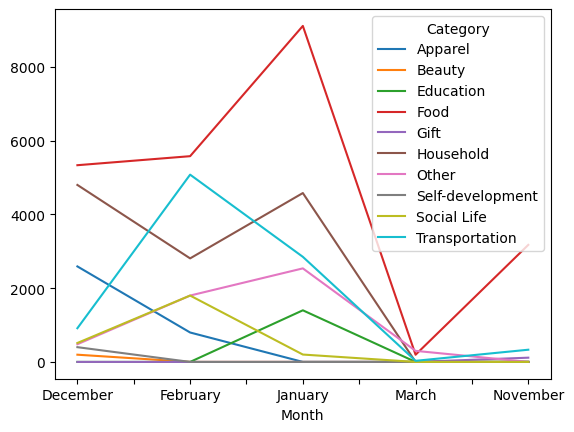

In [69]:
exp_e.pivot_table(index= 'Month', columns='Category', values='Amount', aggfunc='sum',fill_value=0).plot()

### Plotting a graph of Income/Expense month by month

<Axes: xlabel='Month'>

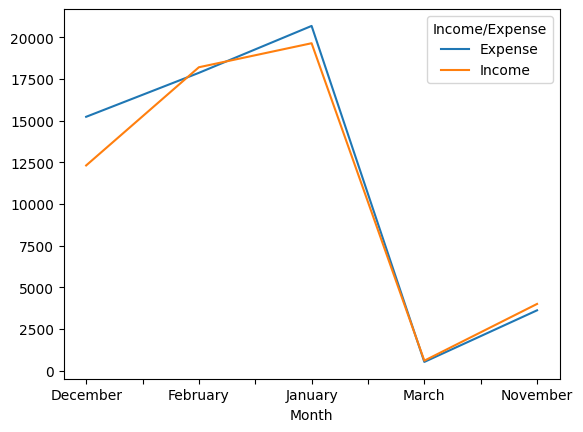

In [70]:
exp.pivot_table(index= 'Month', columns='Income/Expense', values='Amount', aggfunc='sum',fill_value=0).plot()

### Plotting a graph of cash vs online payment month by month

<Axes: xlabel='Month'>

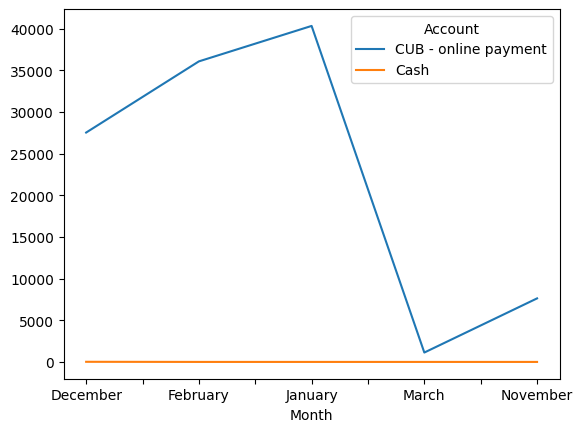

In [71]:
exp.pivot_table(index= 'Month', columns='Account', values='Amount', aggfunc='sum',fill_value=0).plot()